<a href="https://colab.research.google.com/github/nmao007/Apnea-Study/blob/main/Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 30

Autosaving every 30 seconds


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
!pip install mne

In [3]:
import pandas as pd
import numpy as np
import os
import mne
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data_folder = "/content/drive/MyDrive/Synopsys 24-25/Initial Data"
"""
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C.,
Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and
PhysioNet: Components of a new research resource for complex physiologic
signals. Circulation [Online]. 101 (23), pp. e215–e220.
"""

'\nGoldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C.,\nMark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and\nPhysioNet: Components of a new research resource for complex physiologic\nsignals. Circulation [Online]. 101 (23), pp. e215–e220.\n'

In [ ]:
os.listdir(data_folder)

**Preprocessing Functions & Data Visualization**


Preprocessing subject details functions

In [6]:
startsdf = pd.read_csv('/content/drive/MyDrive/Synopsys 24-25/Initial Data/SubjectDetails.csv')
starts = startsdf['PSG Start Time'].to_list()

Subject details visualization

In [7]:
starts

['0:11:04',
 '23:07:50',
 '23:28:42',
 '23:57:14',
 '23:30:22',
 '23:29:11',
 '22:35:22',
 '22:51:18',
 '22:47:38',
 '23:23:21',
 '23:44:00',
 '23:37:59',
 '23:02:45',
 '23:16:05',
 '23:49:02',
 '23:30:33',
 '23:48:21',
 '22:52:05',
 '23:35:05',
 '22:55:51',
 '22:58:02',
 '0:25:37',
 '22:58:13',
 '22:56:30',
 '0:29:08']

Preprocessing edf functions

In [8]:
def load_edf(path):
  raw = mne.io.read_raw_edf(path, preload=True)
  raw.filter(0.3, 30, fir_design='firwin')
  return raw

In [9]:
def plot_edf(raw, dur, scale):
  raw.plot(n_channels=len(raw.ch_names), duration=dur, scalings={"eeg": scale}, show=True, block=True)

In [10]:
def extract_eeg(raw):
  eegs = raw.copy().pick(["C3A2", "C4A1"])
  return eegs

Edf Visualization

In [ ]:
edftestpath = "/content/drive/MyDrive/Synopsys 24-25/Initial Data/person 1/ucddb002.edf"

raw = load_edf(edftestpath)

Using matplotlib as 2D backend.


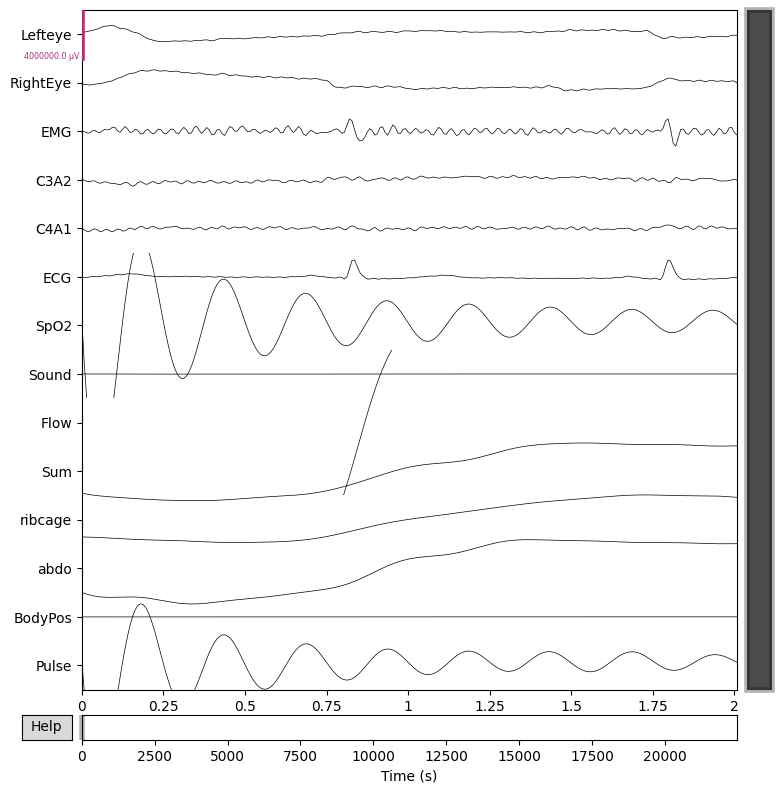

In [12]:
plot_edf(raw, 2, 2)

In [ ]:
type(raw)

In [22]:
eegs = extract_eeg(raw)

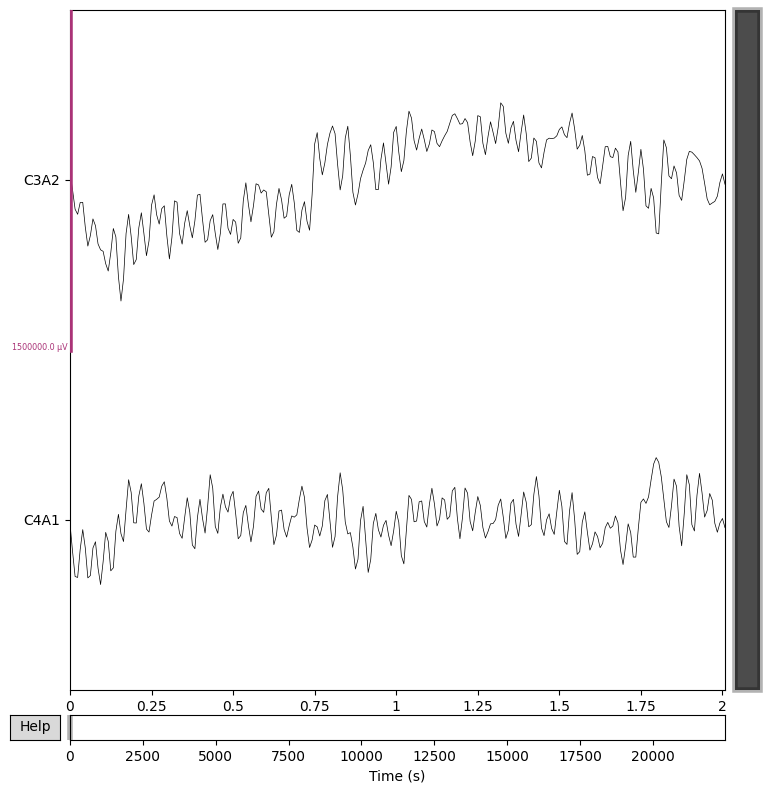

In [24]:
plot_edf(eegs, 2, 0.75)

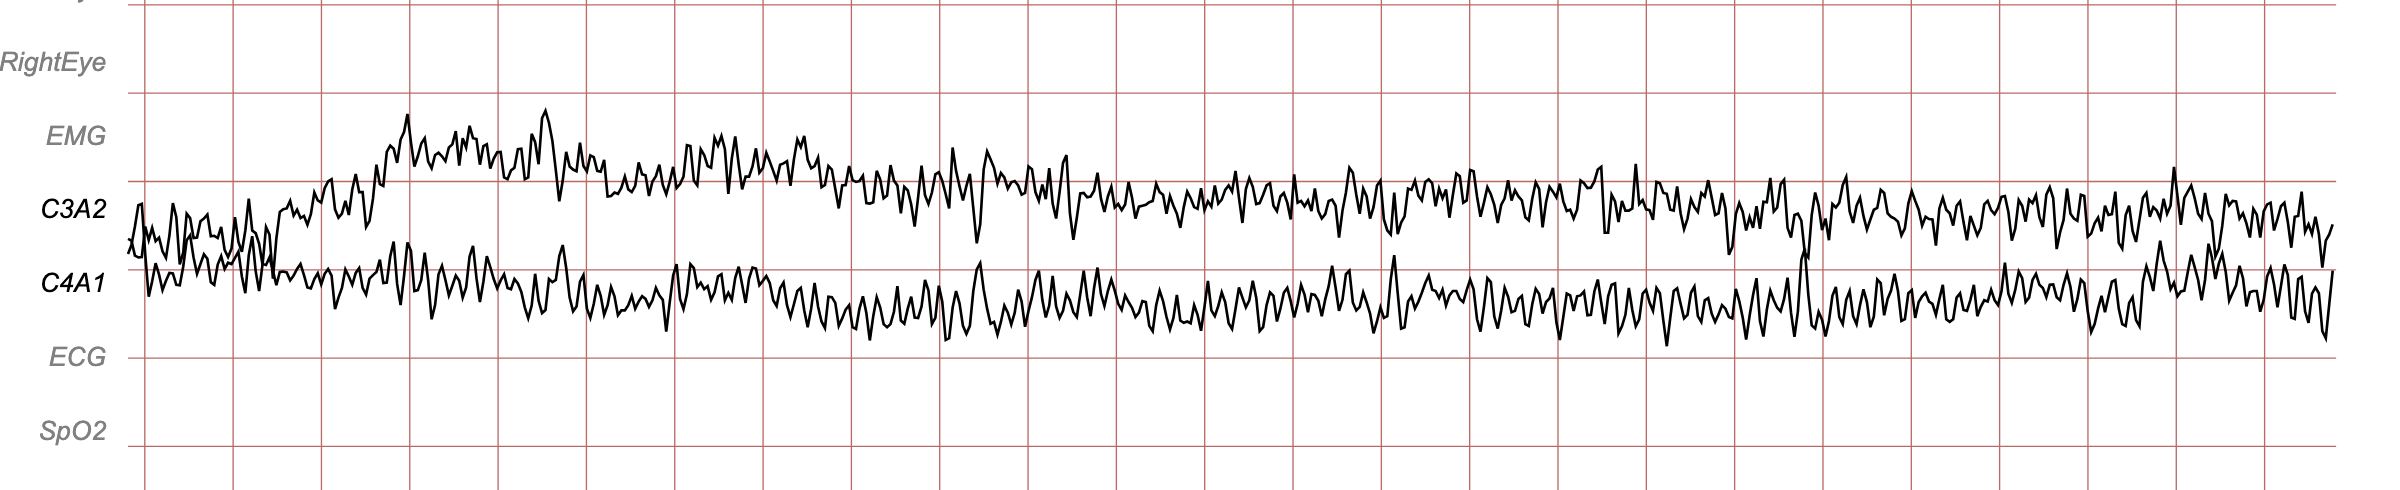

Preprocessing txt data (apnea time, sleep stage) functions

respevt.txt files

In [25]:
def load_ap(path):
  df = pd.read_fwf(path, widths=[10, 8, 6, 10, 10, 10, 10, 10, 10],
                   names=["Time", "Type", "PB/CS", "Duration", "Low", "%Drop", "Snore", "Arousal", "B/T"])
  df = df.iloc[3:len(df)-1]
  df = df[["Time", "Type", "Duration"]]
  df = df.reset_index(drop=True)
  return df

In [26]:
def to_seconds(df, start):
  adjust = None
  h, m, s = start.split(':')
  if (int(h) > 20):
    adjust = 86400 - (int(h)*3600 + int(m)*60 + int(s))
  else:
    adjust = -1 * (int(h)*3600 + int(m)*60 + int(s))

  for i in range(len(df)):
    time = df.at[i, 'Time']
    h, m, s = time.split(':')
    if (int(h) > 20):
      df.at[i, 'Time'] = (int(h)*3600 + int(m)*60 + int(s) - 86400) + adjust
    else:
      df.at[i, 'Time'] = int(h)*3600 + int(m)*60 + int(s) + adjust

  return df

In [27]:
def duration_to_int(df):
  for i in range(len(df)):
    df.at[i, 'Duration'] = int(df.at[i, 'Duration'])
  return df

stages.txt files

In [28]:
def load_stage(path):
  with open(path, "r") as file:
    stages = [int(line.strip()) for line in file]
  return stages

Txt file data visualization

In [29]:
''' STAGES DOCUMENT '''

stagetest = "/content/drive/MyDrive/Synopsys 24-25/Initial Data/person 1/ucddb002_stage.txt"

arr = load_stage(stagetest)

print(arr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 4, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 2, 2, 3, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [30]:
''' APNEA EVENT DOCUMENT VISUALIZATION '''

aptest = "/content/drive/MyDrive/Synopsys 24-25/Initial Data/person 10/ucddb012_respevt.txt"

dftest = load_ap(aptest)
dftest = to_seconds(dftest, starts[11])
dftest = duration_to_int(dftest)

dftest.head()

,Time,Type,Duration
0,1805,APNEA-O,20
1,3308,APNEA-O,20
2,3342,HYP-O,15
3,3381,APNEA-C,16
4,3413,APNEA-C,19


**Segmenting EEG, extracting data, and pipeline preprocessing function**

In [31]:
'''
helper function for segment_eeg
'''

def add(lst, eegs, start, end):
  lst.append(eegs.copy().crop(tmin=start, tmax=end))
  return lst

In [32]:
'''
segment 10 second chunks of eeg based on the start time of apnea events

if a 10 second chunk has more than 3 seconds of apnea, we append it to apnea

Cases:
  1. case 1, apnea: apnea part is completely inside 10s interval and it is 3s or more
  2. case 2, apnea: apnea part is overlapping to the left of 10s interval and overlap is 3s or more
  3. case 3, apnea: apnea part is overlapping to the right of 10s interval and overlap is 3s or more
  4. case 4, apnea: 10 s interval is completely inside apnea part
  5. case 5, nonapnea: 10s interval has less than 3s of apnea in it

'''

def segment_eeg_10(df, eegs, stages):
  apnea = [[],[]]
  nonapnea = [[],[]]

  t=0
  index=0
  while (t+10 < int(eegs.n_times/eegs.info['sfreq']-1) and t//30 < len(stages)):

    start = df.at[index, 'Time']
    end = start + df.at[index, 'Duration']

    #if (t % 1000 == 0):
      #print(str(t) + ": apnea segment from " + str(start) + " to " + str(end))

    stage = -1
    if (stages[t//30] == 1): #REM sleep
        stage = 0
    elif (stages[t//30] >= 2 and stages[t//30] <= 5): #NREM sleep
        stage = 1
    else: #if stage is unkown/wake, we discard the data
      if (end <= t+10 and index < len(df)-1):
        index+=1
        #print("next apnea: " + str(df.at[index, 'Time']) + " to " + str(df.at[index, 'Time'] + df.at[index, 'Duration']))
      t+=10
      continue

    if (end <= t+10 and start >= t):

      if (end-start >= 3): #case 1
        apnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())
        #print("found at " + str(t) + ", stage: " + str(stage))
      else: #case 5
        nonapnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())

    elif (end > t and start < t and end < t+10):

      if (end-t >= 3): #case 2
        apnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())
        #print("found at " + str(t) + ", stage: " + str(stage))
      else: #case 5
        nonapnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())

    elif (start < t+10 and end > t+10 and start > t):

      if (t+10-start >= 3): #case 3
        apnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())
        #print("found at " + str(t) + ", stage: " + str(stage))
      else: #case 5
        nonapnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())

    elif (start <= t and end >= t+10): #case 4

      apnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data())
      #print("found at " + str(t) + ", stage: " + str(stage))

    else:
      #if (t == 4890):
        #print("5: skipped over " + str(t) + ", start apnea: " + str(start) + ", end apnea: " + str(end))
      nonapnea[stage].append((eegs.copy().crop(tmin=t, tmax=t+10)).get_data()) #case 5

    if (end <= t+10 and index < len(df)-1):
        index+=1
        #print("next apnea: " + str(df.at[index, 'Time']) + " to " + str(df.at[index, 'Time'] + df.at[index, 'Duration']))

    t+=10

  return apnea, nonapnea

In [ ]:
def pipeline(pathedf, pathap, pathstage, person):
  raw = load_edf(pathedf)

  df = load_ap(pathap)
  df = to_seconds(df, starts[person])
  df = duration_to_int(df)

  stages = load_stage(pathstage)

  eegs = extract_eeg(raw)

  apnea, nonapnea = segment_eeg_10(df, eegs, stages)

  return apnea, nonapnea

In [ ]:
def data_split(apnea, nonapnea):
  train_size = 0.7
  valid_size = 0.2
  test_size = 0.1

  train_index = int(len(apnea)*train_size)
  valid_index = int(len(apnea)*(train_size+valid_size))

  '''train data split'''
  trainapnea = apnea[:train_index]
  trainnonapnea = nonapnea[:train_index]

  Xtrain_pre = np.concatenate((trainapnea, trainnonapnea), axis=0)
  ytrain_pre = np.concatenate((np.ones(len(trainapnea)),np.zeros(len(trainnonapnea))), axis=0)

  train_indices = np.random.permutation(len(Xtrain_pre))

  Xtrain = Xtrain_pre[train_indices]
  ytrain = ytrain_pre[train_indices]

  '''valid data split'''
  validapnea = apnea[train_index:valid_index]
  validnonapnea = nonapnea[train_index:valid_index]

  Xvalid_pre = np.concatenate((validapnea, validnonapnea), axis=0)
  yvalid_pre = np.concatenate((np.ones(len(validapnea)),np.zeros(len(validnonapnea))), axis=0)

  valid_indices = np.random.permutation(len(Xvalid_pre))

  Xvalid = Xvalid_pre[valid_indices]
  yvalid = yvalid_pre[valid_indices]

  '''test data split'''
  testapnea = apnea[valid_index:]
  testnonapnea = nonapnea[valid_index:]

  Xtest_pre = np.concatenate((testapnea, testnonapnea), axis=0)
  ytest_pre = np.concatenate((np.ones(len(testapnea)),np.zeros(len(testnonapnea))), axis=0)

  test_indices = np.random.permutation(len(Xtest_pre))

  Xtest = Xtest_pre[test_indices]
  ytest = ytest_pre[test_indices]

  return Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest

In [ ]:
def cut_length(apnea, nonapnea):
  minlen = min(len(apnea), len(nonapnea))

  apnea = apnea[:minlen]
  nonapnea = nonapnea[:minlen]

  return apnea, nonapnea

In [ ]:
def cut_length_stages(REMapnea, REMnonapnea, NREMapnea, NREMnonapnea):
  minlen = min(len(REMapnea), len(REMnonapnea), len(NREMapnea), len(NREMnonapnea))

  REMapnea = REMapnea[:minlen]
  REMnonapnea = REMnonapnea[:minlen]
  NREMapnea = NREMapnea[:minlen]
  NREMnonapnea = NREMnonapnea[:minlen]

  return REMapnea, REMnonapnea, NREMapnea, NREMnonapnea

In [ ]:
def adjust_shape(arr):
  shape = (len(arr), len(arr[0][0]), len(arr[0]))

  arr_transpose = np.zeros(shape)

  for i in range(len(arr)):
    swapped = np.transpose(arr[i])
    arr_transpose[i] = swapped

  return arr_transpose

In [ ]:
def normalize(arr):
  scaler = StandardScaler()
  arr_normalized = np.zeros(arr.shape)

  for i in range(len(arr)):
    sample = arr[i]
    sample_normalized = scaler.fit_transform(sample)
    arr_normalized[i] = sample_normalized

  return arr_normalized

**Running the preprocessing procedure**

SMALL DATASET TESTING

In [ ]:
os.listdir(data_folder)

In [ ]:
%%capture

Tap = []
Tnon = []

i=0
for person_folder in os.listdir(data_folder):
  if (i >= 1):
    break

  if (person_folder.endswith("csv")):
    continue

  print(person_folder)

  x = person_folder.split()

  print(int(x[-1]))

  index = int(x[-1]) - 1
  person_path = os.path.join(data_folder, person_folder)

  pathedf, pathap, pathstage = None, None, None
  for filename in os.listdir(person_path):
    if filename.endswith(".edf"):
      pathedf = os.path.join(person_path, filename)
    elif filename.endswith("t.txt"):
      pathap = os.path.join(person_path, filename)
    elif filename.endswith("e.txt"):
      pathstage = os.path.join(person_path, filename)

  #print("edf: " + pathedf + ", apnea: " + pathap + ", stages: " + pathstage)

  ap, non = pipeline(pathedf, pathap, pathstage, index)
  Tap.extend(ap[0])
  Tap.extend(ap[1])
  Tnon.extend(non[0])
  Tnon.extend(non[1])

  i+=1

In [ ]:
np.random.shuffle(Tap)
np.random.shuffle(Tnon)

In [ ]:
Tap, Tnon = cut_length(Tap, Tnon)

In [ ]:
Tap = adjust_shape(Tap)
Tnon = adjust_shape(Tnon)

In [ ]:
Tap = normalize(Tap)
Tnon = normalize(Tnon)

In [ ]:
TXtrain, Tytrain, TXvalid, Tyvalid, TXtest, Tytest = data_split(Tap, Tnon)

In [ ]:
TXtrainpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXtrain'
Tytrainpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tytrain'

TXvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXvalid'
Tyvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tyvalid'

TXtestpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXtest'
Tytestpath = '/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tytest'

In [ ]:
np.save(TXtrainpath, TXtrain)
np.save(Tytrainpath, Tytrain)

np.save(TXvalidpath, TXvalid)
np.save(Tyvalidpath, Tyvalid)

np.save(TXtestpath, TXtest)
np.save(Tytestpath, Tytest)

NORMAL DATASET:

In [ ]:
%%capture

REM_apnea = []
NREM_apnea = []
REM_nonapnea = []
NREM_nonapnea = []

for person_folder in os.listdir(data_folder):

  if (person_folder.endswith("csv")):
    continue

  x = person_folder.split()
  print(int(x[-1]))
  index = int(x[-1]) - 1

  person_path = os.path.join(data_folder, person_folder)

  pathedf, pathap, pathstage = None, None, None
  for filename in os.listdir(person_path):
    if filename.endswith(".edf"):
      pathedf = os.path.join(person_path, filename)
    elif filename.endswith("t.txt"):
      pathap = os.path.join(person_path, filename)
    elif filename.endswith("e.txt"):
      pathstage = os.path.join(person_path, filename)

  #print("edf: " + pathedf + ", apnea: " + pathap + ", stages: " + pathstage)

  ap, non = pipeline(pathedf, pathap, pathstage, index)
  REM_apnea.extend(ap[0])
  REM_nonapnea.extend(non[0])
  NREM_apnea.extend(ap[1])
  NREM_nonapnea.extend(non[1])

In [ ]:
REMapnea, NREMapnea, REMnonapnea, NREMnonapnea = cut_length_stages(REM_apnea, NREM_apnea, REM_nonapnea, NREM_nonapnea)
#cut versions dont have underscore

In [ ]:
apnea_pre = np.concatenate((REM_apnea, NREM_apnea), axis=0)
nonapnea_pre = np.concatenate((REM_nonapnea, NREM_nonapnea), axis=0)
#we don't use the cut version so we can get as much overall data as possible

np.random.shuffle(apnea_pre)
np.random.shuffle(nonapnea_pre)

In [ ]:
''' Overall data '''

apnea, nonapnea = cut_length(apnea_pre, nonapnea_pre)

apnea = adjust_shape(apnea)
nonapnea = adjust_shape(nonapnea)

apnea = normalize(apnea)
nonapnea = normalize(nonapnea)

Xtrain, ytrain, Xvalid, yvalid, Xtest, ytest = data_split(apnea, nonapnea)

In [ ]:
''' REM data '''

REMapnea = adjust_shape(REMapnea)
REMnonapnea = adjust_shape(REMnonapnea)

REMapnea = normalize(REMapnea)
REMnonapnea = normalize(REMnonapnea)

REMXtrain, REMytrain, REMXvalid, REMyvalid, REMXtest, REMytest = data_split(REMapnea, REMnonapnea)

In [ ]:
''' NREM data '''

NREMapnea = adjust_shape(NREMapnea)
NREMnonapnea = adjust_shape(NREMnonapnea)

NREMapnea = normalize(NREMapnea)
NREMnonapnea = normalize(NREMnonapnea)

NREMXtrain, NREMytrain, NREMXvalid, NREMyvalid, NREMXtest, NREMytest = data_split(NREMapnea, NREMnonapnea)

In [ ]:
len(REMytrain)

saving overall data:

In [ ]:
Xtrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/Xtrain'
ytrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/ytrain'

Xvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/Xvalid'
yvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/yvalid'

Xtestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/Xtest'
ytestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/Overall Data/ytest'

In [ ]:
np.save(Xtrainpath, Xtrain)
np.save(ytrainpath, ytrain)

np.save(Xvalidpath, Xvalid)
np.save(yvalidpath, yvalid)

np.save(Xtestpath, Xtest)
np.save(ytestpath, ytest)

saving rem data:

In [ ]:
REMXtrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMXtrain'
REMytrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMytrain'

REMXvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMXvalid'
REMyvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMyvalid'

REMXtestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMXtest'
REMytestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/REM Data/REMytest'

In [ ]:
np.save(REMXtrainpath, REMXtrain)
np.save(REMytrainpath, REMytrain)

np.save(REMXvalidpath, REMXvalid)
np.save(REMyvalidpath, REMyvalid)

np.save(REMXtestpath, REMXtest)
np.save(REMytestpath, REMytest)

saving nrem data:

In [ ]:
NREMXtrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMXtrain'
NREMytrainpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMytrain'

NREMXvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMXvalid'
NREMyvalidpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMyvalid'

NREMXtestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMXtest'
NREMytestpath = '/content/drive/MyDrive/Synopsys 24-25/Final Data/NREM Data/NREMytest'

In [ ]:
np.save(NREMXtrainpath, NREMXtrain)
np.save(NREMytrainpath, NREMytrain)

np.save(NREMXvalidpath, NREMXvalid)
np.save(NREMyvalidpath, NREMyvalid)

np.save(NREMXtestpath, NREMXtest)
np.save(NREMytestpath, NREMytest)

# Model Construction and Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, metrics, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.losses import BinaryFocalCrossentropy
import shutil
import random
import numpy as np
import os

In [ ]:
TXtrain = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXtrain.npy')
Tytrain = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tytrain.npy')

TXvalid = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXvalid.npy')
Tyvalid = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tyvalid.npy')

TXtest = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/TXtest.npy')
Tytest = np.load('/content/drive/MyDrive/Synopsys 24-25/Small Test Data/12_people_test/Tytest.npy')

In [ ]:
print(np.unique(Tytrain, return_counts=True))
print(np.unique(Tyvalid, return_counts=True))

In [ ]:
time_points = len(TXtrain[0])
channels = 2

input_shape = (time_points, channels)

In [ ]:
''' model structure '''

model = keras.Sequential([
    layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=input_shape, kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    #layers.Dropout(0.1),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(filters=64, kernel_size=5, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    #layers.Dropout(0.1),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    #layers.Dropout(0.1),
    #layers.MaxPooling1D(pool_size=2),

    #layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
    #layers.BatchNormalization(),
    #layers.MaxPooling1D(pool_size=2),

    #layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.GlobalAveragePooling1D(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'), #kernel_initializer="glorot_uniform") #put all into a single neuron
])

In [ ]:
''' callbacks '''

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)
tensorboard = TensorBoard(log_dir='./logs') #visualizing the training

In [ ]:
''' compiling model '''

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(), metrics.Precision()])

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
log_dir = './logs'
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)

In [ ]:
model.fit(TXtrain, Tytrain, validation_data=(TXvalid, Tyvalid), epochs=40, batch_size=16,
          callbacks=[early_stopping, checkpoint, reduce_lr, tensorboard])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./logs

In [ ]:
Ty_pred = model.predict(TXvalid)
print(np.min(Ty_pred), np.max(Ty_pred))

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)